In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def makeDF(file):
    df = pd.read_csv(file);
    # set column names
    df.columns=['name','sex','count'];
    uniqueCounts = sorted(list(set(df['count'].values)),reverse=True)
    ranks = [uniqueCounts.index(x) for x in df['count'].values]
    df['rank']=ranks;
    df['name'] = df['name'].str.lower();
    df = df.sort_values(by='count',ascending=False);
    return df;

years = [1880, 1900, 1920, 1940, 1960, 1980, 2000, 2019];
dfs = {}
for year in years:
    dfs[year] = makeDF('yob'+str(year)+'.txt')

def filterBySex(df,sex=None):
    if sex is None:
        return df;
    else:
        return df[df['sex']==sex.upper()];

def nameRows(name,year=2019,sex=None,match='full'):
    df=filterBySex(dfs[year],sex);
    if match=='full':
        return df[df['name']==name.lower()];
    elif match=='start':
        return df[df['name'].str.startswith(name.lower())];
    elif match=='end':
        return df[df['name'].str.endswith(name.lower())];
    elif match=='anywhere':
        return df[df['name'].str.contains(name.lower())];
    

def nameCount(name,year=2019,sex=None,match='full'):
    return len(nameRows(name,year=year,sex=sex,match=match)['count'].values);

def babyCount(name,year=2019,sex=None,match='full'):
    return sum(nameRows(name,year=year,sex=sex,match=match)['count'].values);

def startsWith(letter,year=2019,sex=None):
    df=filterBySex(dfs[year],sex);
    return df[df['name'].str.startswith(letter.lower())];
      
def barChart(counts,xlabels,labels,title=None):
    ind = np.arange(len(counts[0])) 
    width = 1/(len(counts)+1);
    plt.figure(figsize=(13,6))
    for ix in range(len(counts)):
        plt.bar(ind -(len(counts)-1)*width/2 + ix*width, counts[ix], width, label= None if labels is None else labels[ix])
    plt.ylabel('Count');
    plt.title(title)
    plt.xticks(ind, xlabels)
    if labels is not None:
        plt.legend(loc='best')
    plt.show()  
            
def namesByYear(names,sex=None,match='full'):
    df = filterBySex(dfs[year],sex);
    names = names if isinstance(names,list) else [names];
    counts = [[nameCount(name,year=year,match=match,sex=sex) for year in years] for name in names];
    barChart(counts,years,names);

def babiesByYear(names,sex=None,match='full'):
    df = filterBySex(dfs[year],sex);
    names = names if isinstance(names,list) else [names];
    counts = [[babyCount(name,year=year,match=match,sex=sex) for year in years] for name in names];
    barChart(counts,years,names);

def namesByLetter(letters=[chr(ix) for ix in range(65,65+26)],year=2019,sex=None,match='start'):
    df = filterBySex(dfs[year],sex);
    counts = [[nameCount(letter,year=year,match=match,sex=sex) for letter in letters]];
    barChart(counts,letters,None);

def babiesByLetter(letters=[chr(ix) for ix in range(65,65+26)],year=2019,sex=None,match='start'):
    df = filterBySex(dfs[year],sex);
    counts = [[babyCount(letter,year=year,match=match,sex=sex) for letter in letters]];
    barChart(counts,letters,None)

def startsWithBarChart(letters=[chr(ix) for ix in range(65,65+26)],year=2019):
    counts = [[nameCount(letter,year=year,match='start',sex=sex) for letter in letters] for sex in ['M','F']];
    barChart(counts,letters,['Male','Female'],title='Name popularity by starting letter in '+str(year))

Compare the popularity of two names over the years

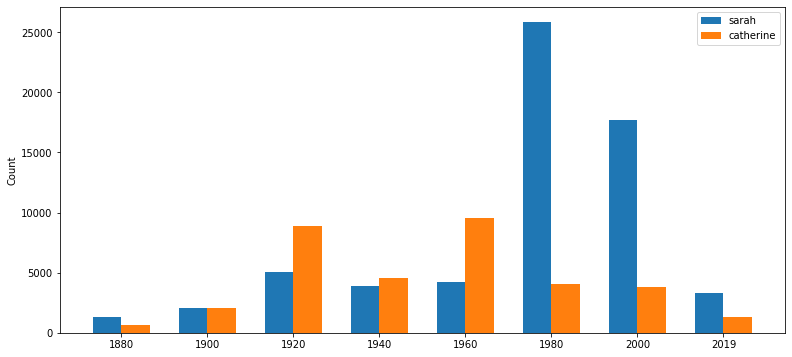

In [6]:
babiesByYear(['sarah','catherine'])

Compare the number of names starting with particular letters

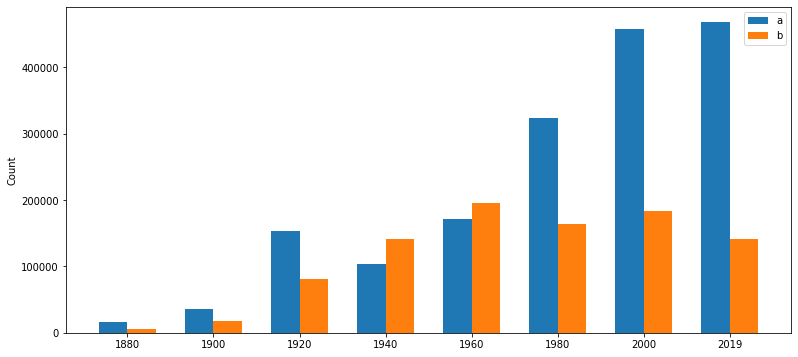

In [7]:
babiesByYear(['a','b'],match='start')

Compare the number of names ending with each letter in one year

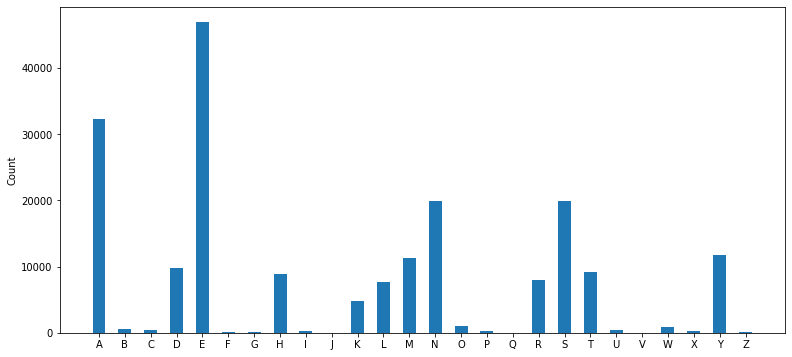

In [8]:
babiesByLetter(match='end',year=1880)

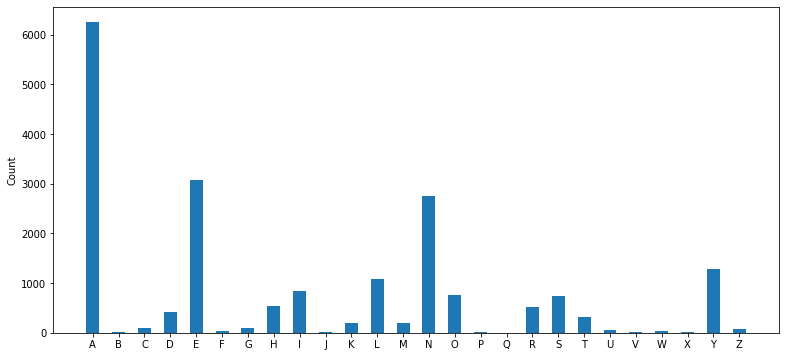

In [9]:
namesByLetter(match='end',year=1980)

## Pick a year and look up some names

In [10]:
nameRows('alex')

,name,sex,count,rank
18069,alex,M,2376,277
1463,alex,F,149,1230


In [11]:
nameRows('alex',year=1940,sex='f')

,name,sex,count,rank
3869,alex,F,6,875


In [12]:
nameRows('c',match='start',year=1940,sex='f')

,name,sex,count,rank
4,carol,F,21761,13
13,carolyn,F,12655,31
47,carole,F,4790,92
51,catherine,F,4582,98
53,charlotte,F,4290,103
...,...,...,...,...
4456,cattie,F,5,876
4455,cathaleen,F,5,876
4454,casandra,F,5,876
4453,carrolle,F,5,876


## Baby name popularity by year

### What is the most popular STARTING LETTER for names that you can find?

In [13]:
startsWith('u')

,name,sex,count,rank
18357,uriel,M,655,776
18520,uriah,M,440,949
18734,ulises,M,270,1109
18924,ulysses,M,203,1176
19380,urijah,M,116,1263
...,...,...,...,...
17688,uswa,F,5,1374
17687,usha,F,5,1374
17686,universe,F,5,1374
17685,ulyssa,F,5,1374


### We can separately check boys and girls

In [14]:
startsWith('j',sex='f')

,name,sex,count,rank
87,josephine,F,3087,203
97,julia,F,2775,227
102,jade,F,2703,234
129,jasmine,F,2092,306
153,josie,F,1846,350
...,...,...,...,...
16466,janelli,F,5,1374
16465,janea,F,5,1374
16464,janavi,F,5,1374
16463,janari,F,5,1374


### Let's compare the letter frequency using a bar chart

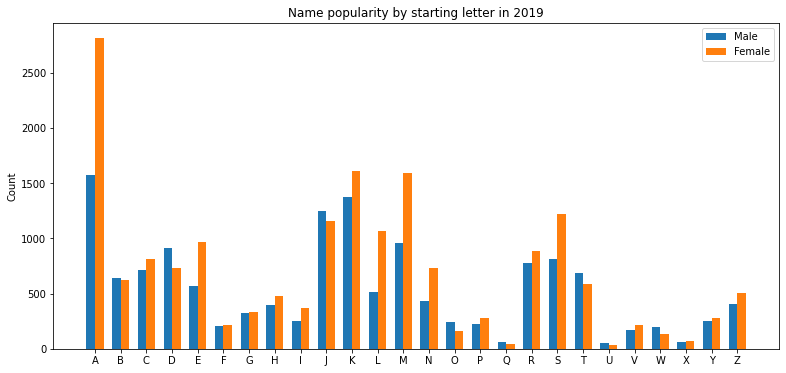

In [15]:
startsWithBarChart()

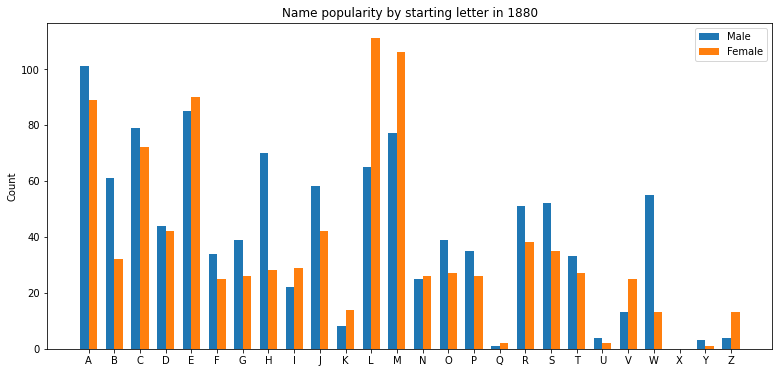

In [16]:
startsWithBarChart(year=1880)

In [17]:
startsWith('q',year=1880)

,name,sex,count,rank
414,queen,F,17,292
537,queenie,F,11,298
1670,quincy,M,8,301
